<a href="https://colab.research.google.com/github/GenoaroSJr/DataScienceSmarkio/blob/main/cross_validation_K_Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importes necessários de bibliotecas e arquivo.

In [1]:
from google.colab import drive
import pandas as pd

In [2]:
drive.mount("/content/drive/")
df = pd.read_excel("/content/drive/MyDrive/teste_smarkio_Lbs.xls")
df.head()

Mounted at /content/drive/


,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN


### Tratando os dados

In [3]:
x = len(df)

Truee = df['True_class']
Pred = df['Pred_class']

for i in range(x):
  if (Truee[i] >= 0):
    ...
  else:
    Truee[i] = Pred[i]
  
print(df)

     Pred_class  probabilidade    status  True_class
0             2       0.079892  approved         0.0
1             2       0.379377  approved        74.0
2             2       0.379377  approved        74.0
3             2       0.420930  approved        74.0
4             2       0.607437  approved         2.0
..          ...            ...       ...         ...
595          74       0.432421  approved        74.0
596          82       0.590576  approved        82.0
597          92       0.915543  approved        92.0
598          96       0.334495  approved        96.0
599          99       0.373226  approved        22.0

[600 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [4]:
tamanho = len(df)
Truee2 = df['True_class']
Pred2 = df['Pred_class']
for i in range(tamanho):
  if (Truee2[i] != Pred2[i]):
    Pred2[i] = 0;
  else: 
    Pred2[i] = 1

df.head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pred_class,probabilidade,status,True_class
0,0,0.079892,approved,0.0
1,0,0.379377,approved,74.0
2,0,0.379377,approved,74.0
3,0,0.420930,approved,74.0
4,1,0.607437,approved,2.0
5,1,0.690894,approved,2.0
6,1,0.759493,approved,2.0
7,1,0.834910,approved,2.0
8,1,0.861396,approved,2.0
9,1,1.000000,approved,2.0


### ML - cross-validation k-Fold

In [5]:
#Importes
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [6]:
#Separando so previsores das calsses
classe = df.iloc[:,0].values
previsores = df.iloc[:,1].values

In [8]:
#Fazendo com que o array tenha dimensões de (x,1).
previsores = np.reshape(previsores,(-1,1))
#classe = np.reshape(classe,(-1,1))
len(previsores)

600

In [9]:
previsores.shape
previsores.shape[0]
#b = np.zeros(shape=(previsores.shape[0],1))

600

In [10]:
#Importando as bibliotecas necessárias para estratificação e acuracia
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [11]:
#Determiando a quantiades de splits k = 10
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
resultados = []

In [12]:
#Fazendo o ML
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0],1))):
  classificador = GaussianNB()
  classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
  previsoes = classificador.predict(previsores[indice_teste])
  precisao = accuracy_score(classe[indice_teste], previsoes)
  resultados.append(precisao)

In [13]:
#Resultado para cada separação do algoritmo K-fold
print(resultados)
len(resultados)

[0.6666666666666666, 0.75, 0.8, 0.7833333333333333, 0.7333333333333333, 0.8, 0.6833333333333333, 0.8166666666666667, 0.8333333333333334, 0.75]


10

In [14]:
#Média de acerto - determinada a confiabilidade na ML
resultados = np.asarray(resultados)
resultados.mean()

0.7616666666666666

Predição dados "revision"

In [15]:
df2 = pd.read_excel("/content/drive/MyDrive/Data-revision.xlsx")
df2.head()

,Pred_class,probabilidade,status
0,2,0.752448,revision
1,24,0.817525,revision
2,24,0.909148,revision
3,25,0.509871,revision
4,25,0.629700,revision


In [16]:
revision = df2.iloc[:,1].values
print(revision)

[0.75244765 0.81752524 0.90914783 0.5098706  0.62969995 0.63342581
 0.62122641 0.74029212 0.40373359 0.41972322 0.54547849 0.48706882
 0.32070209 0.28712597 0.51111815 0.33116804 0.39980799 0.40532651
 0.32413663 0.73713288 0.81211181 0.81211181 0.7257935  0.42199774
 0.35140133 0.31300296 0.51673338 0.33435048 0.35103074 0.78491964
 0.27851571 0.30191529 0.57475593 0.50665405 0.31830646 0.28554497
 0.74007516 0.67526913 0.54377229 0.55384572 0.60606494 0.56184244
 0.34073956]


In [ ]:
#Tratando os dados para que tenham estrutura igual a (x,1)
revision = np.reshape(revision,(-1,1))
print(revision)

In [18]:
#Aplicando no algoritmo treinado
previsoes_revision = []
for i in range(len(revision)):
  previsoes_revision.append(classificador.predict(revision[[i]]))

In [ ]:
#Resultado em array
previsoes_revision = np.asarray(previsoes_revision)
print(previsoes_revision)

### Breve análise dos resultados


In [20]:
df2['Previsão'] = previsoes_revision
df2.head(5)

,Pred_class,probabilidade,status,Previsão
0,2,0.752448,revision,1
1,24,0.817525,revision,1
2,24,0.909148,revision,1
3,25,0.509871,revision,1
4,25,0.629700,revision,1


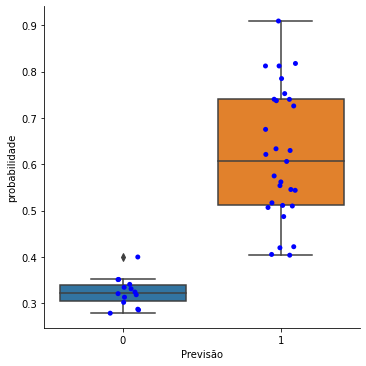

In [21]:
import seaborn as sns
sns.catplot(x="Previsão", y="probabilidade", kind="box", data=df2);
sns.stripplot(x="Previsão", y="probabilidade", data=df2, color="blue");

### Observação Final
> Aqui devemos ficar atentos para a propagação de erro. Já havia uma certa taxa de erros no dados coletados do data frame (verificado na análise exploratória), há também uma taxa de erro da predição deste artigo que soma ao erro já existente. Portanto, é certo dizer que a taxa de acerto desse código está abaixo do valor demonstrado (0,76).